# Driver Kaggle

I start by downloading and and unziping the competition data from Kaggle and ensure my directory structure looks like this
```
utils/
    vgg16.py
    utils.py
lesson1/
    driver_kaggle.ipynb
    data/
        driver/
            train/
                ...
            test/
                ...
```
```$ sudo apt-get install python-pip python-dev build-essential 
$ sudo pip install --upgrade pip 
$ sudo pip install --upgrade virtualenv 
$ sudo apt-get install kaggle-cli
$ kg download -u 'username' -p 'pwd' -c 'state-farm-distracted-driver-detection'
$ sudo apt-get install ffmpeg #if need to get out of MemoryError```

You can download the data files from the competition page [here](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data) or you can download them from the command line using the [Kaggle CLI](https://github.com/floydwch/kaggle-cli).

Then I launch your notebook inside the lesson1 directory
```
cd lesson1
jupyter notebook
```

In [7]:
%cd
%cd nbs/lesson1
%pwd

/home/ubuntu
/home/ubuntu/nbs/lesson1


u'/home/ubuntu/nbs/lesson1'

In [8]:
%matplotlib inline

In [9]:
%cd data/driver/train

/home/ubuntu/nbs/lesson1/data/driver/train


In [10]:
%mkdir ../valid
%mkdir ../results

mkdir: cannot create directory ‘../valid’: File exists
mkdir: cannot create directory ‘../results’: File exists


## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories 
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

In [35]:
%matplotlib inline
path = 'data/driver/'
result_path = 'data/driver/results/'
%cd
%cd nbs

/home/ubuntu
/home/ubuntu/nbs


In [27]:
import os, json
from glob import glob
import numpy as np

from utils import *
%cd
%cd nbs/lesson1/data/driver/train

/home/ubuntu
/home/ubuntu/nbs/lesson1/data/driver/train


#### <font color=blue> Create validation set and sample</font>

In [28]:
for d in glob('c?'):
    os.mkdir('../valid/'+d)
    g = glob(d+'/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(200):
        os.rename(shuf[i], '../valid/' + shuf[i])

OSError: [Errno 17] File exists: '../valid/c7'

In [20]:
%mkdir ../sample

mkdir: cannot create directory ‘../sample’: File exists


In [29]:
%cd
%cd nbs
%pwd

/home/ubuntu
/home/ubuntu/nbs


u'/home/ubuntu/nbs'

#### <font color=blue> Finetuning and train</font>

In [30]:
from vgg16 import Vgg16

In [31]:
vgg = Vgg16()

In [32]:
batch_size=64
nb_of_epochs=1

In [131]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

Found 18424 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [132]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=0.01)

Epoch 1/0
18424/18424 [==============================] - 534s - loss: 2.0104 - acc: 0.4457 - val_loss: 0.6539 - val_acc: 0.7830


In [114]:
#vgg.finetune(batches)
#vgg.model.optimizer.lr = 0.01

In [117]:
#latest_weights_filename = None
#for epoch in range(nb_of_epochs):
 #   print "Running epoch: %d" % epoch
 #   vgg.fit(batches, val_batches, nb_epoch=0.01)
 #   latest_weights_filename = 'ft%d.h5' % epoch
 #   vgg.model.save_weights(result_path+latest_weights_filename)
#print "Completed %s fit operations" % nb_of_epochs

Running epoch: 0
Epoch 1/1
18424/18424 [==============================] - 531s - loss: 10.9033 - acc: 0.2625 - val_loss: 10.1526 - val_acc: 0.3465
Completed 1 fit operations


#### <font color=blue> Generate Prodictions</font>

In [150]:
vgg.model.save_weights(result_path+'driver_kaggle1.h5')

In [38]:
%cd lesson1/

/home/ubuntu/nbs/lesson1


In [39]:
vgg.model.load_weights(result_path+'driver_kaggle1.h5')

In [40]:
test_path = '/home/ubuntu/nbs/lesson1/data/driver/train'
batches, preds = vgg.test(test_path, batch_size = batch_size)

Found 18424 images belonging to 10 classes.


In [41]:
print preds[:5]
filenames = batches.filenames
print filenames[:5]

[[  9.7501e-01   1.7504e-03   5.9778e-04   2.1766e-03   9.7294e-03   1.0513e-03   1.0086e-03
    4.2260e-04   5.4874e-04   7.7088e-03]
 [  9.6096e-01   2.1905e-03   1.6836e-03   7.8005e-03   7.6639e-03   1.7897e-03   3.2095e-03
    1.9720e-04   5.0451e-04   1.4000e-02]
 [  6.0762e-01   7.1769e-03   7.9601e-03   5.6616e-02   1.8726e-02   1.8521e-01   3.6079e-03
    9.0119e-04   2.0093e-03   1.1017e-01]
 [  8.9874e-01   4.5831e-02   4.2813e-03   6.6709e-03   1.4190e-02   2.6656e-04   6.8626e-03
    1.1354e-03   4.4811e-04   2.1575e-02]
 [  5.7431e-01   6.1559e-02   1.6650e-03   5.5549e-02   1.0088e-02   1.7460e-01   2.1885e-03
    2.5971e-03   5.6756e-03   1.1177e-01]]
['c0/img_95728.jpg', 'c0/img_74437.jpg', 'c0/img_58721.jpg', 'c0/img_21699.jpg', 'c0/img_2813.jpg']


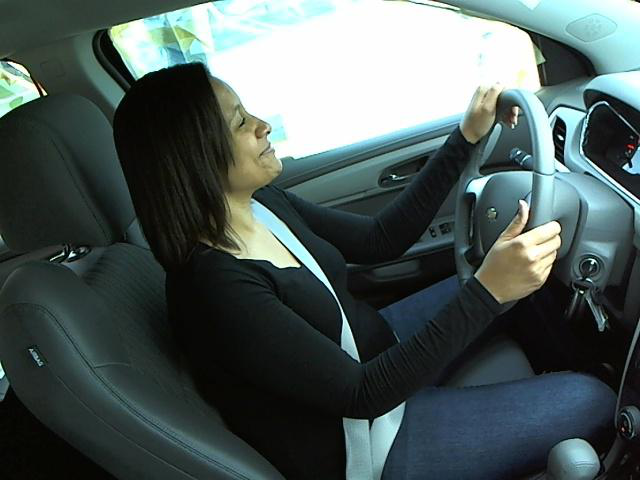

In [46]:
test_path = '/home/ubuntu/nbs/lesson1/data/driver/train/'
from PIL import Image
Image.open(test_path + filenames[2])

In [47]:
save_array(result_path + 'test_preds.dat', preds)
save_array(result_path + 'filenames.dat', filenames)

#### <font color=blue> Validate Prodictions</font>

In [49]:
%cd
%cd nbs/lesson1
vgg.model.load_weights(result_path+'driver_kaggle1.h5')

/home/ubuntu
/home/ubuntu/nbs/lesson1


In [52]:
valid_path = '/home/ubuntu/nbs/lesson1/data/driver/valid/'
val_batches, probs = vgg.test(valid_path, batch_size=batch_size)

Found 2000 images belonging to 10 classes.


In [53]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [54]:
from keras.preprocessing import image
#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

#### <font color=green> Correct prediction </font>

Found 380 correct labels


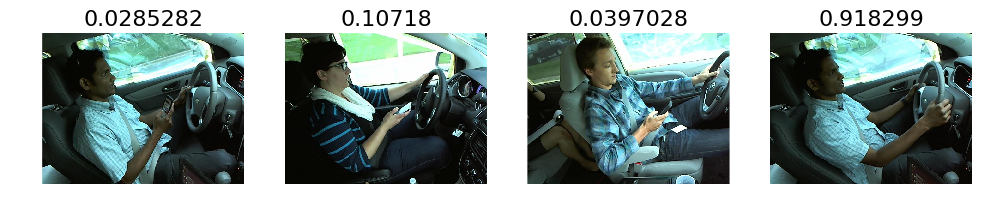

In [55]:
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

#### <font color=red> Incorrect predictions </font>

Found 1620 incorrect labels


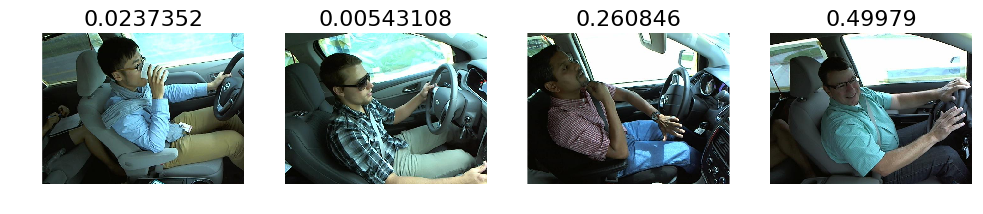

In [58]:
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])